<a href="https://colab.research.google.com/github/soulayman-al-abdallah/TimeSeries-Cryptocurrencies-Analysis/blob/main/Time_Series_Crypto_Stable_Coins_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series analysis** of *Stable cryptocurrencies*.
--------------


Source of the data: An excel file extracted from CoinMarketCap and saved on Github.

Data Science work done by: **Eng. Soulayman Al-Abdallah**.
Some technical comments added by: **NFT trader Rami Zohbi**.

Content:
- Importing modules and data
- DataFrame Preparation
- Data Visualization
- Series Decomposition
- Autocorrelation Check

Time series analysis of the **stable coins** [USDT-USDC] based on multiple features.

Move ahead to the **Data Visualization** part, to see the data shape, and visualise the features [volumes, market cap, changes..]

#**Importing modules and data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import preprocessing

In [ ]:
# from google.colab import files
# uploaded_file = files.upload()

In [ ]:
!git clone https://github.com/soulayman-al-abdallah/public-repo.git

fatal: destination path 'public-repo' already exists and is not an empty directory.


In [ ]:
xls = pd.ExcelFile('/content/public-repo/coin compare.xlsx')
df_stable = pd.read_excel(xls, 'stablecoin mc')
df_stable

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Date,volume usdt,Volune USDc,volume difference,Market Cap USDT,Market Cad USDc,market cap difference,Volume percentage usdc to usdt,market cap percentage between usdt and usdc
1,"Nov 27, 2022",27588594951,2289589937,25299005014,65336770716,44238097614,21098673102,0.08299,0.677078
2,"Nov 26, 2022",25190862393,2436483647,22754378746,65334834067,44056847002,21277987065,0.096721,0.674324
3,"Nov 25, 2022",25728613650,2547890810,23180722840,65335066420,43883957510,21451108910,0.099029,0.671675
4,"Nov 24, 2022",36841695607,3455771499,33385924108,65324717866,44032562708,21292155158,0.093801,0.674057
...,...,...,...,...,...,...,...,...,...
1509,"Oct 11, 2018",3772600000,4177290,3768422710,2687547150,0,2687547150,0.001107,0
1510,"Oct 10, 2018",2295300000,711783,2294588217,2688835407,0,2688835407,0.00031,0
1511,"Oct 09, 2018",2183500000,108803,2183391197,2697704351,0,2697704351,0.00005,0
1512,"Oct 08, 2018",2594100000,382900,2593717100,2794674054,0,2794674054,0.000148,0


# **DataFrame Preparation**

In [ ]:
df_stable.columns = df_stable.iloc[0]
# Removing first row and last 17 rows
df_stable = df_stable.iloc[1:]
df_stable = df_stable.iloc[:-17]

#renaming columns and relocating the "Volume percentage usdc to usdt" to be close to volume related columns
df_stable.columns = ['Date', 'volume usdt', 'Volume USDc', 'volume difference', 'USDT MarCap', 'USDC MarCap', 'MarCap difference', 'Volume % C/T', 'MarCap % C/T']
# shift column 'C' to first position
seventh_column = df_stable.pop('Volume % C/T')
  
# insert column using insert(position,column_name,first_column) function
df_stable.insert(4, 'Volume % C/T', seventh_column)
df_stable.head(3)

,Date,volume usdt,Volume USDc,volume difference,Volume % C/T,USDT MarCap,USDC MarCap,MarCap difference,MarCap % C/T
1,"Nov 27, 2022",27588594951,2289589937,25299005014,0.08299,65336770716,44238097614,21098673102,0.677078
2,"Nov 26, 2022",25190862393,2436483647,22754378746,0.096721,65334834067,44056847002,21277987065,0.674324
3,"Nov 25, 2022",25728613650,2547890810,23180722840,0.099029,65335066420,43883957510,21451108910,0.671675


In [ ]:
# using dictionary to convert specific columns
convert_dict = {'Date': object,
                'volume usdt': int,
                'Volume USDc': int,
                'volume difference': int,
                'Volume % C/T': np.float16,
                'USDT MarCap': int,
                'USDC MarCap': int,
                'MarCap difference': int,
                'MarCap % C/T': np.float16}
 
df_stable = df_stable.astype(convert_dict)
print(df_stable.dtypes)

Date                  object
volume usdt            int64
Volume USDc            int64
volume difference      int64
Volume % C/T         float16
USDT MarCap            int64
USDC MarCap            int64
MarCap difference      int64
MarCap % C/T         float16
dtype: object


In [ ]:
# convert the 'Date' column from string type (object) to datetime format
df_stable['Date']= pd.to_datetime(df_stable['Date'])
df_stable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 1 to 1496
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1496 non-null   datetime64[ns]
 1   volume usdt        1496 non-null   int64         
 2   Volume USDc        1496 non-null   int64         
 3   volume difference  1496 non-null   int64         
 4   Volume % C/T       1496 non-null   float16       
 5   USDT MarCap        1496 non-null   int64         
 6   USDC MarCap        1496 non-null   int64         
 7   MarCap difference  1496 non-null   int64         
 8   MarCap % C/T       1496 non-null   float16       
dtypes: datetime64[ns](1), float16(2), int64(6)
memory usage: 87.8 KB


In [ ]:
df_stable.head(3)

,Date,volume usdt,Volume USDc,volume difference,Volume % C/T,USDT MarCap,USDC MarCap,MarCap difference,MarCap % C/T
1,2022-11-27,27588594951,2289589937,25299005014,0.083008,65336770716,44238097614,21098673102,0.677246
2,2022-11-26,25190862393,2436483647,22754378746,0.096741,65334834067,44056847002,21277987065,0.674316
3,2022-11-25,25728613650,2547890810,23180722840,0.098999,65335066420,43883957510,21451108910,0.671875


In [ ]:
#Indexing by Date column
df_stable = df_stable.set_index(['Date'])
df_stable = df_stable.reindex(index=df_stable.index[::-1])
df_stable.head(3)

,volume usdt,Volume USDc,volume difference,Volume % C/T,USDT MarCap,USDC MarCap,MarCap difference,MarCap % C/T
Date,,,,,,,,
2018-10-24,1781560000,923940,1780636060,0.000519,2003344845,85597084,1917747761,0.042725
2018-10-25,1677800000,1365520,1676434480,0.000814,1904828474,85423351,1819405123,0.044861
2018-10-26,1881270000,950623,1880319377,0.000505,1906751043,125705149,1781045894,0.065918




---



---



---



---



---



# **Data Visualization**

In [ ]:
df_stable.head(3)

,volume usdt,Volume USDc,volume difference,Volume % C/T,USDT MarCap,USDC MarCap,MarCap difference,MarCap % C/T
Date,,,,,,,,
2018-10-24,1781560000,923940,1780636060,0.000519,2003344845,85597084,1917747761,0.042725
2018-10-25,1677800000,1365520,1676434480,0.000814,1904828474,85423351,1819405123,0.044861
2018-10-26,1881270000,950623,1880319377,0.000505,1906751043,125705149,1781045894,0.065918


## USDT VS USDC Volumes

⭕ Comparing USDT and USDC variations of **market volumes**.

Using real volumes values, their log values, and their scaled values between 0 and 100.

### **Values of USDT and USDC Volumes**

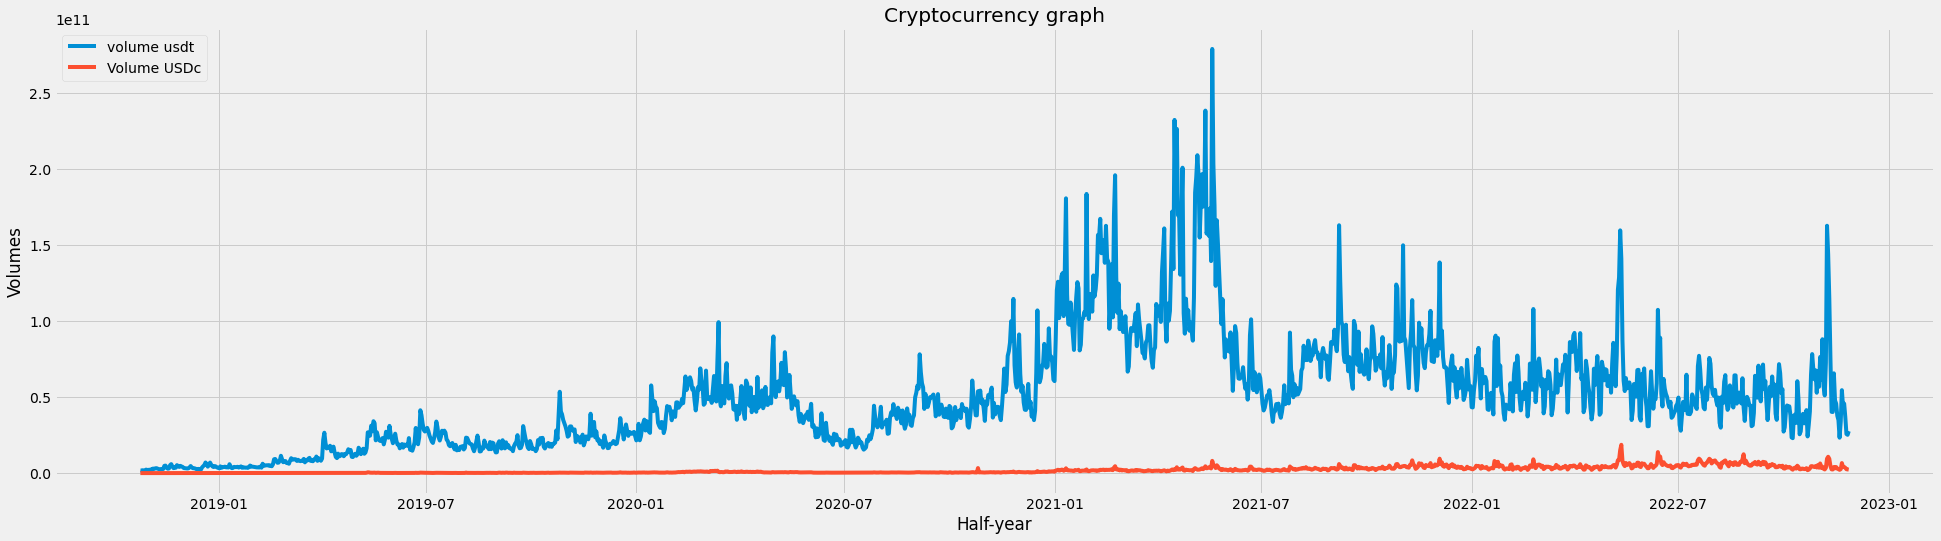

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (30,8))


for c in df_stable.columns[0:2]:
  plt.plot(df_stable[c], label = c)

plt.title('Cryptocurrency graph')
plt.xlabel('Half-year')
plt.ylabel('Volumes')
plt.legend(df_stable.columns[0:2], loc = 'upper left')



---



**Values of USDT and USDC Volumes from a log perispective**

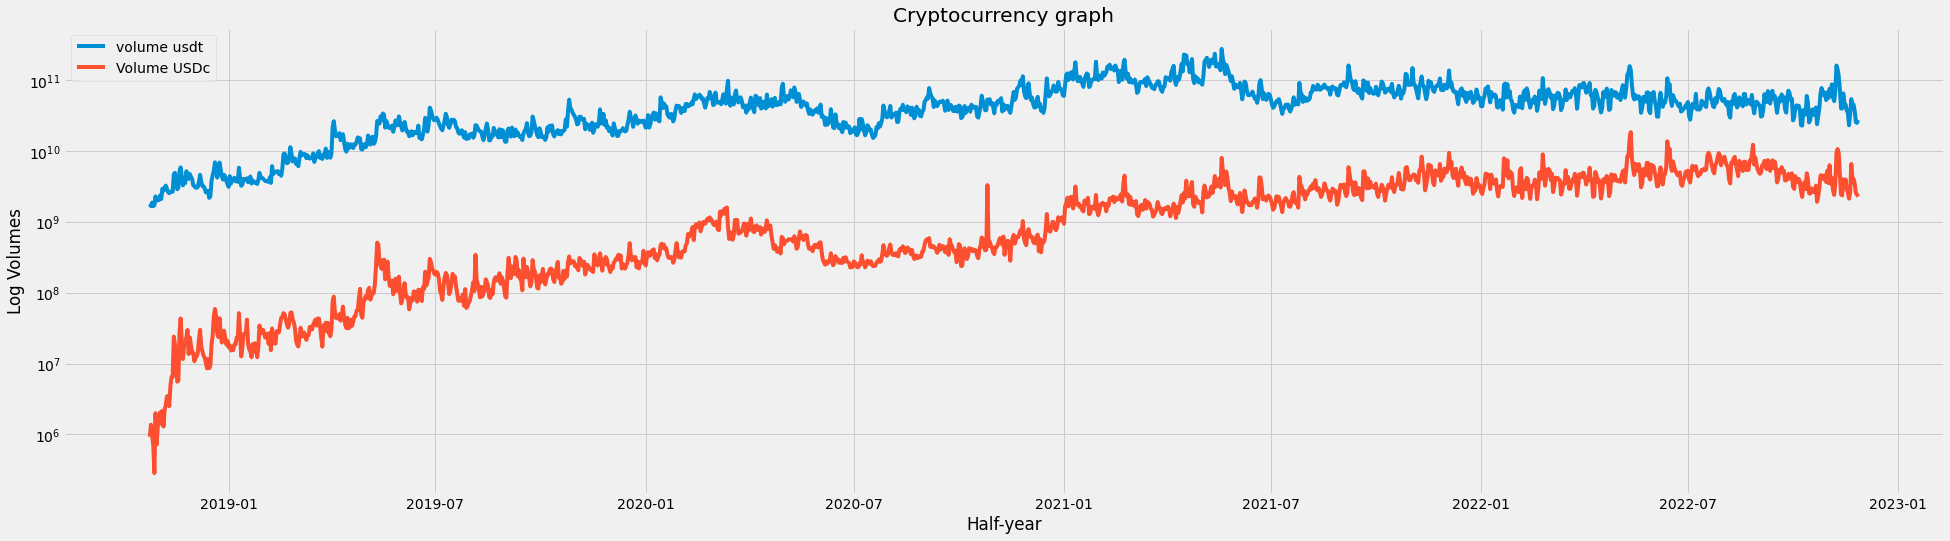

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (30,8))


for c in df_stable.columns[0:2]:
  plt.plot(df_stable[c], label = c)

plt.title('Cryptocurrency graph')
plt.xlabel('Half-year')
plt.ylabel('Log Volumes')
plt.yscale('log')
plt.legend(df_stable.columns[0:2], loc = 'upper left')



---



**Values of 1-100 scaled USDT and USDC Volumes**

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))

scaled_values = min_max_scaler.fit_transform(df_stable)
scaled_df = pd.DataFrame(scaled_values, columns = df_stable.columns)

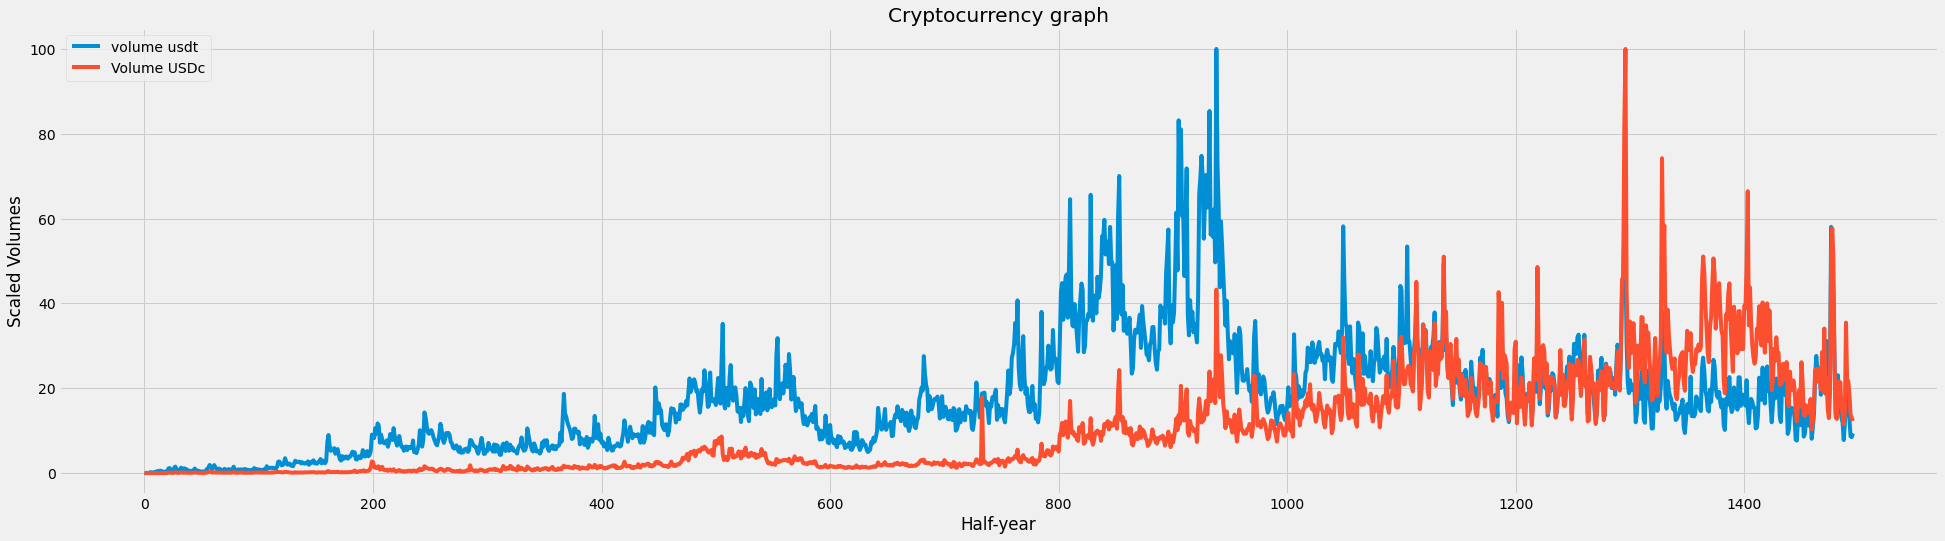

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (30,8))


for c in scaled_df.columns[0:2]:
  plt.plot(scaled_df[c], label = c)

plt.title('Cryptocurrency graph')
plt.xlabel('Half-year')
plt.ylabel('Scaled Volumes')
plt.legend(scaled_df.columns[0:2], loc = 'upper left')

**⭐ Rami**: This chart shows the dominance of USDT (algorithmic stable-coin) in terms of volume comparing to USDC (stable-coin backed with real assets) for a period of time, then we can observe a remarkable decrease in USDT volume due to legal issues that the Tether company was faced at that time which led many investors to shift more towards USDC. In this case, the data is predictable.



---



### **Volumes Percentage USDC/USDT**

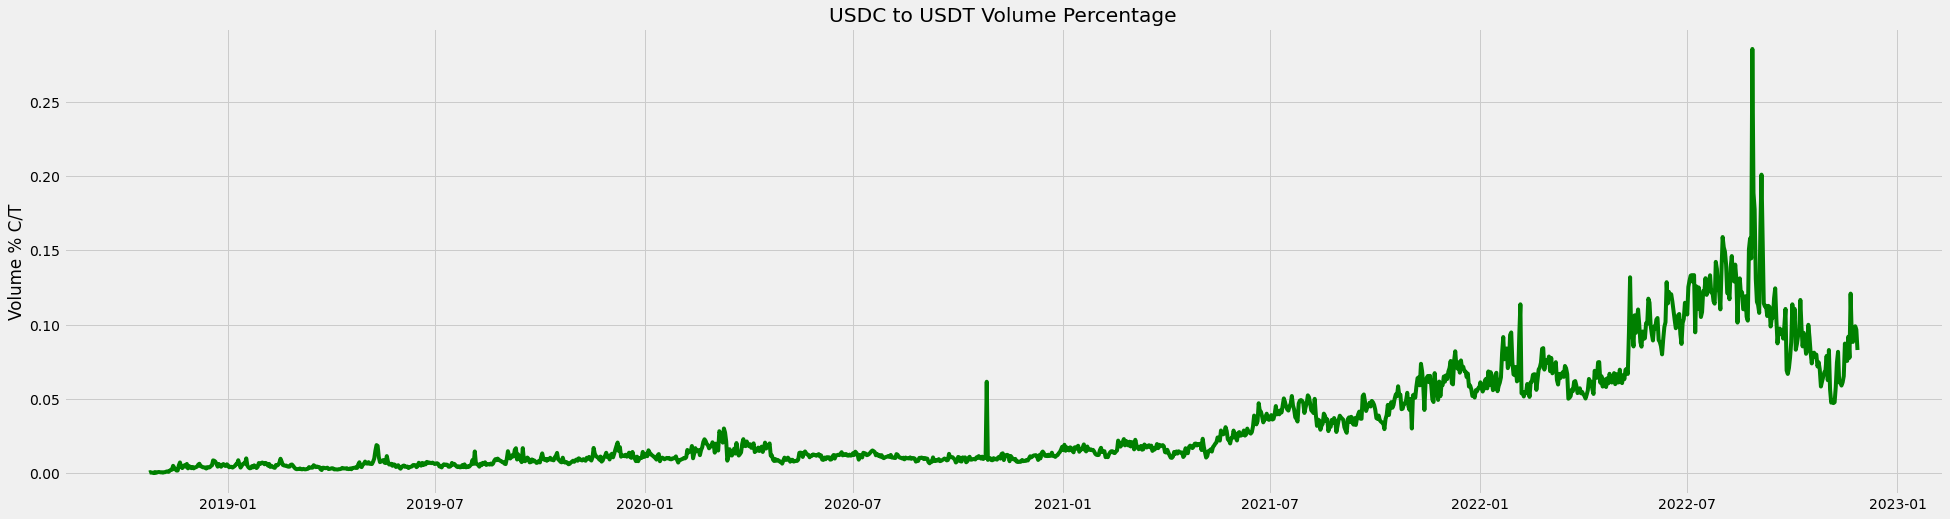

In [ ]:
plt.figure(figsize = (30,8))
plt.plot( df_stable['Volume % C/T'], color='green')
plt.ylabel('Volume % C/T')
plt.title('USDC to USDT Volume Percentage')

plt.show()



---



### **Volumes Difference**

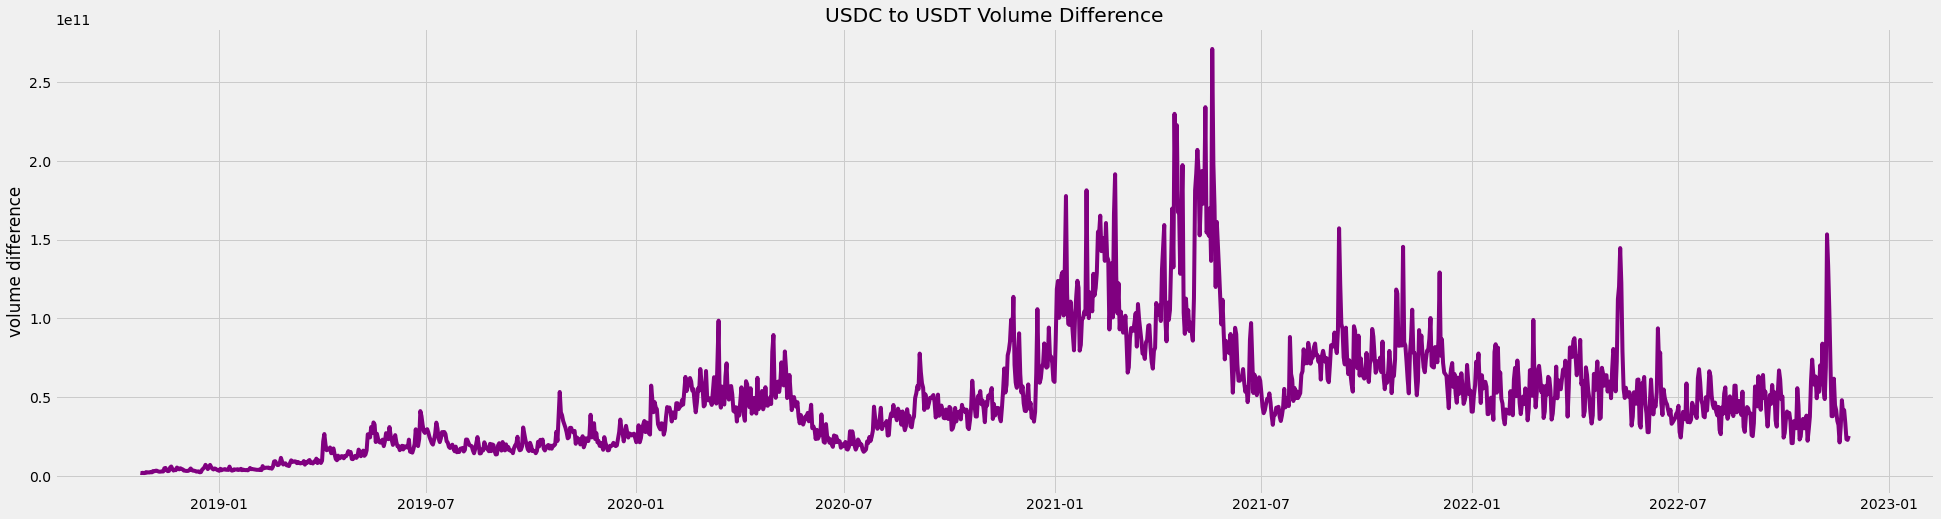

In [ ]:
plt.figure(figsize = (30,8))
plt.plot( df_stable['volume difference'], color='purple')
plt.ylabel('volume difference')
plt.title('USDC to USDT Volume Difference')

plt.show()



---



## USDT VS USDC MarCap

⭕ Comparing USDT and USDC variations of **market cap**.


### **Values of USDT and USDC MarCaps**

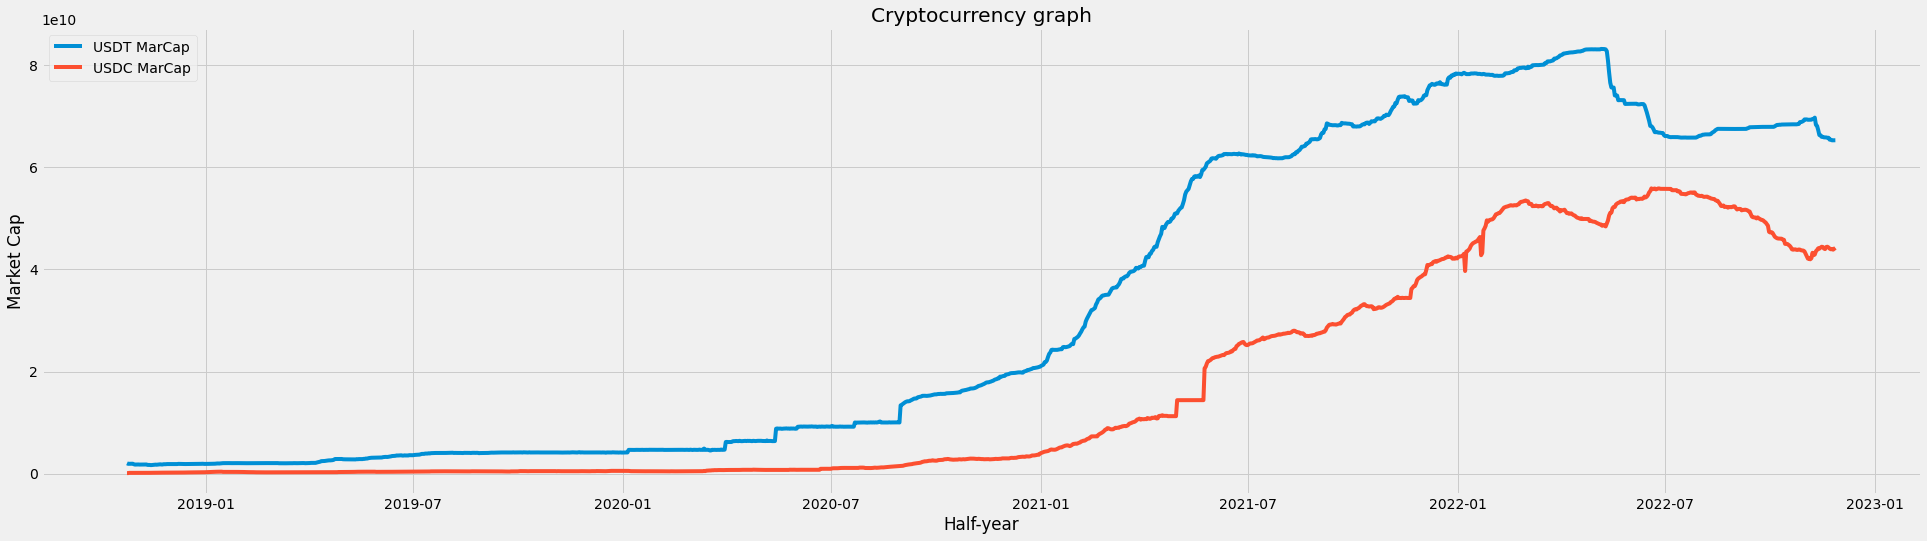

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (30,8))


for c in df_stable.columns[4:6]:
  plt.plot(df_stable[c], label = c)

plt.title('Cryptocurrency graph')
plt.xlabel('Half-year')
plt.ylabel('Market Cap')
plt.legend(df_stable.columns[4:6], loc = 'upper left')



---



### **MarCaps Percentages USDC/USDT**

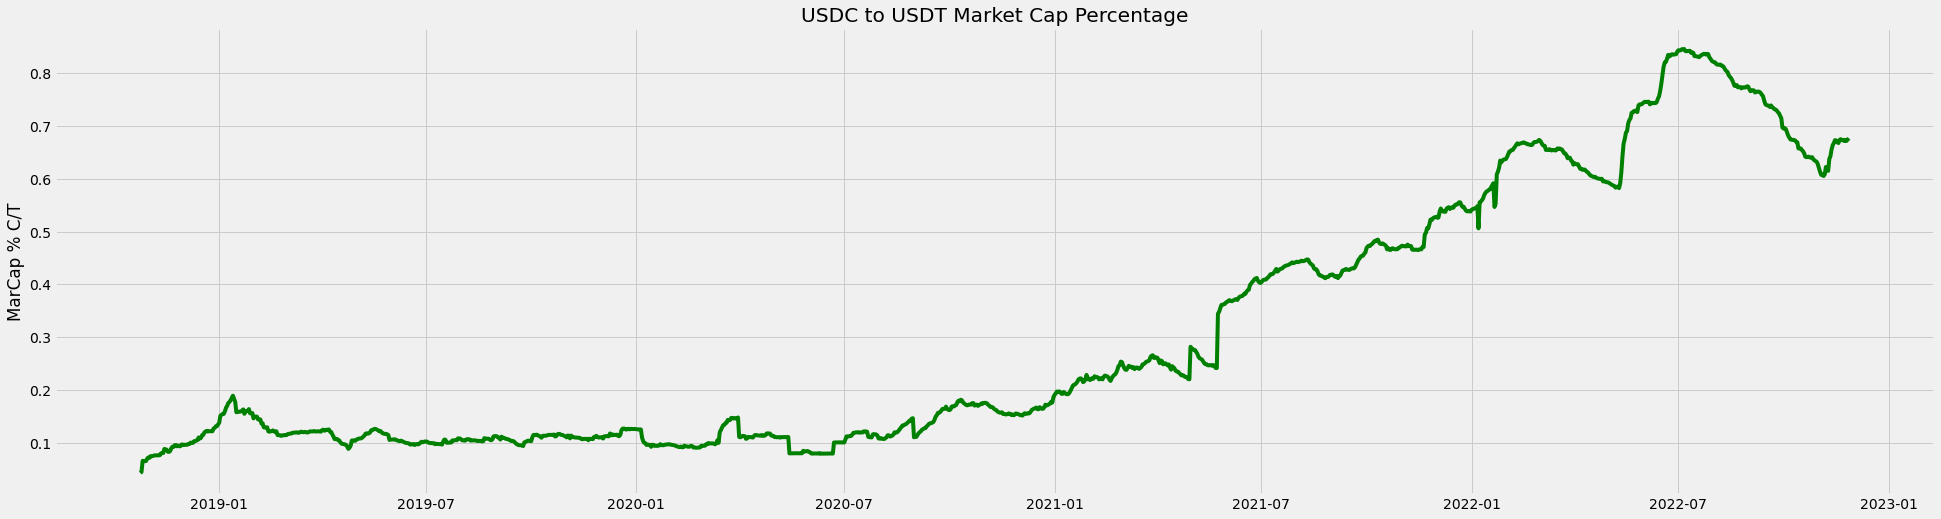

In [ ]:
plt.figure(figsize = (30,8))
plt.plot( df_stable['MarCap % C/T'], color='green')
plt.ylabel('MarCap % C/T')
plt.title('USDC to USDT Market Cap Percentage')

plt.show()

###**MarCap Difference**

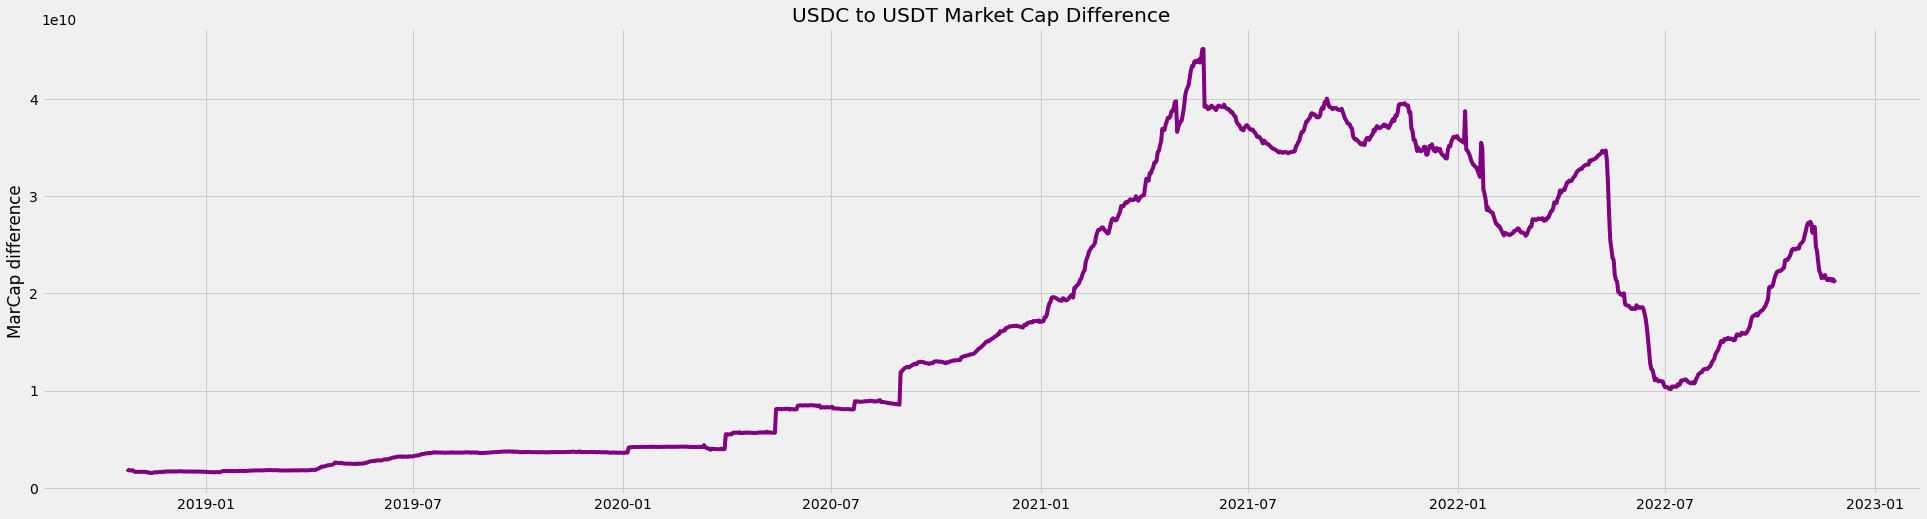

In [ ]:
plt.figure(figsize = (30,8))
plt.plot( df_stable['MarCap difference'], color='purple')
plt.ylabel('MarCap difference')
plt.title('USDC to USDT Market Cap Difference')

plt.show()



---



## Synchronization of both differences

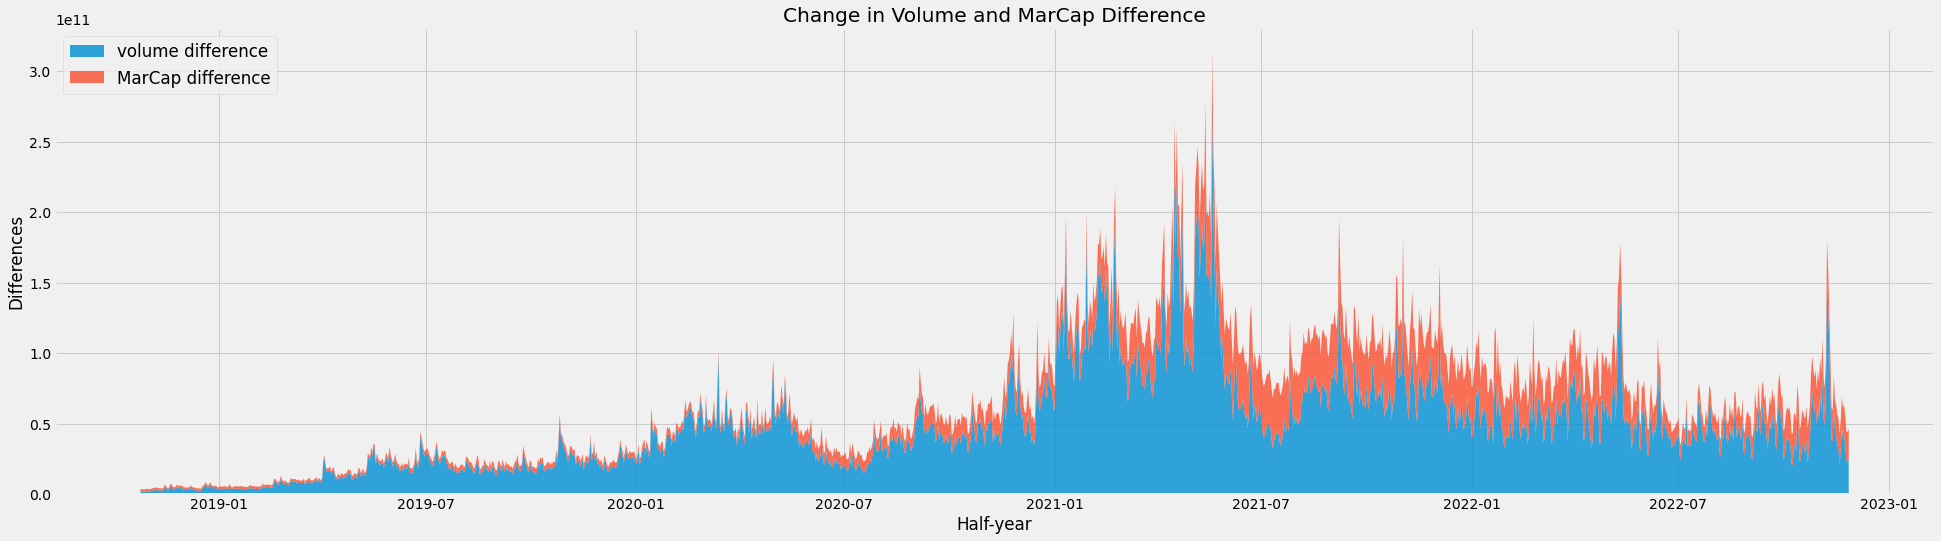

In [ ]:
plt.figure(figsize = (30,8))

plt.stackplot(df_stable.index, 
             [df_stable['volume difference'],
             df_stable['MarCap difference']],
              labels=['volume difference', 'MarCap difference'],
              alpha=0.8)
plt.title('Change in Volume and MarCap Difference')
plt.xlabel('Half-year')
plt.ylabel('Differences')
plt.legend(loc=2, fontsize='large' )
plt.show()



---



In [ ]:
df_stable.head(3)

,volume usdt,Volume USDc,volume difference,Volume % C/T,USDT MarCap,USDC MarCap,MarCap difference,MarCap % C/T
Date,,,,,,,,
2018-10-24,1781560000,923940,1780636060,0.000519,2003344845,85597084,1917747761,0.042725
2018-10-25,1677800000,1365520,1676434480,0.000814,1904828474,85423351,1819405123,0.044861
2018-10-26,1881270000,950623,1880319377,0.000505,1906751043,125705149,1781045894,0.065918




---



# **Decomposition**

The characteristics of a time series are

**Trend and Level** : Long term movement

**Seasonality** : periodic change over a fixed duration

**Random / Noise** : residual random fluctuations

This is an example of **decomposition**: Decomposing the change in  **'volume usdt'** and **'volume USDC'**, to visualize its:
- real values
- trend
- seasonality
- residual noise

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_cols =  ['volume usdt', 'Volume USDc','volume difference',
                   'USDT MarCap', 'USDC MarCap', 'MarCap difference']

for col in decompose_cols:
    decomp = seasonal_decompose(df_stable[col], freq=52, model='additive', extrapolate_trend='freq')
    df_stable[f"{col}_trend"] = decomp.trend
    df_stable[f"{col}_seasonal"] = decomp.seasonal

<ipython-input-48-4ee42582e7df>:7: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp = seasonal_decompose(df_stable[col], freq=52, model='additive', extrapolate_trend='freq')


<ipython-input-49-b2db9cd7fc54>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(df_stable['volume usdt'], freq=20, model='additive', extrapolate_trend='freq')
<ipython-input-49-b2db9cd7fc54>:22: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(df_stable['Volume USDc'], freq=20, model='additive', extrapolate_trend='freq')


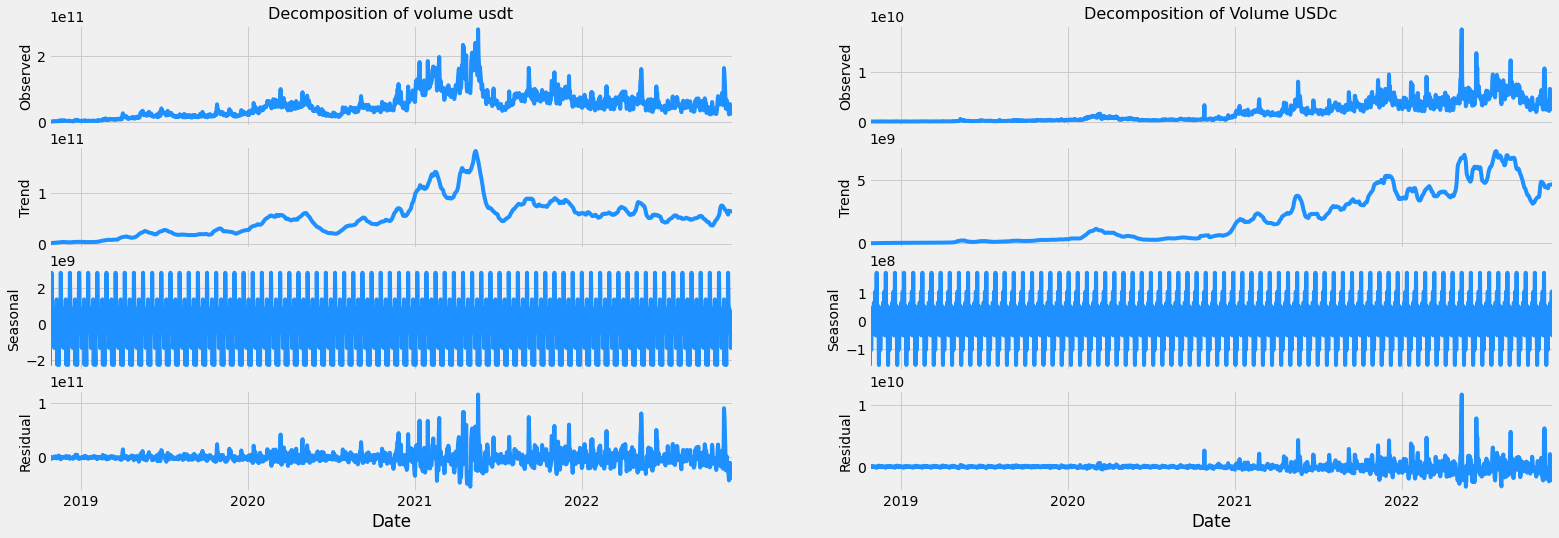

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(24,8))
res = seasonal_decompose(df_stable['volume usdt'], freq=20, model='additive', extrapolate_trend='freq')

ax[0,0].set_title('Decomposition of volume usdt', fontsize=16)
res.observed.plot(ax=ax[0,0], legend=False, color='dodgerblue')
ax[0,0].set_ylabel('Observed', fontsize=14)


res.trend.plot(ax=ax[1,0], legend=False, color='dodgerblue')
ax[1,0].set_ylabel('Trend', fontsize=14)


res.seasonal.plot(ax=ax[2,0], legend=False, color='dodgerblue')
ax[2,0].set_ylabel('Seasonal', fontsize=14)


res.resid.plot(ax=ax[3,0], legend=False, color='dodgerblue')
ax[3,0].set_ylabel('Residual', fontsize=14)


ax[0,1].set_title('Decomposition of Volume USDc', fontsize=16)
res = seasonal_decompose(df_stable['Volume USDc'], freq=20, model='additive', extrapolate_trend='freq')

res.observed.plot(ax=ax[0, 1], legend=False, color='dodgerblue')
ax[0, 1].set_ylabel('Observed', fontsize=14)

res.trend.plot(ax=ax[1, 1], legend=False, color='dodgerblue')
ax[1, 1].set_ylabel('Trend', fontsize=14)

res.seasonal.plot(ax=ax[2, 1], legend=False, color='dodgerblue')
ax[2, 1].set_ylabel('Seasonal', fontsize=14)

res.resid.plot(ax=ax[3, 1], legend=False, color='dodgerblue')
ax[3, 1].set_ylabel('Residual', fontsize=14)

plt.show()



---



Let's decompose all the columns that we have, and compare their:

 **trends**, 
 
 and their **seasonalities** : more used for modeling that predicts future values

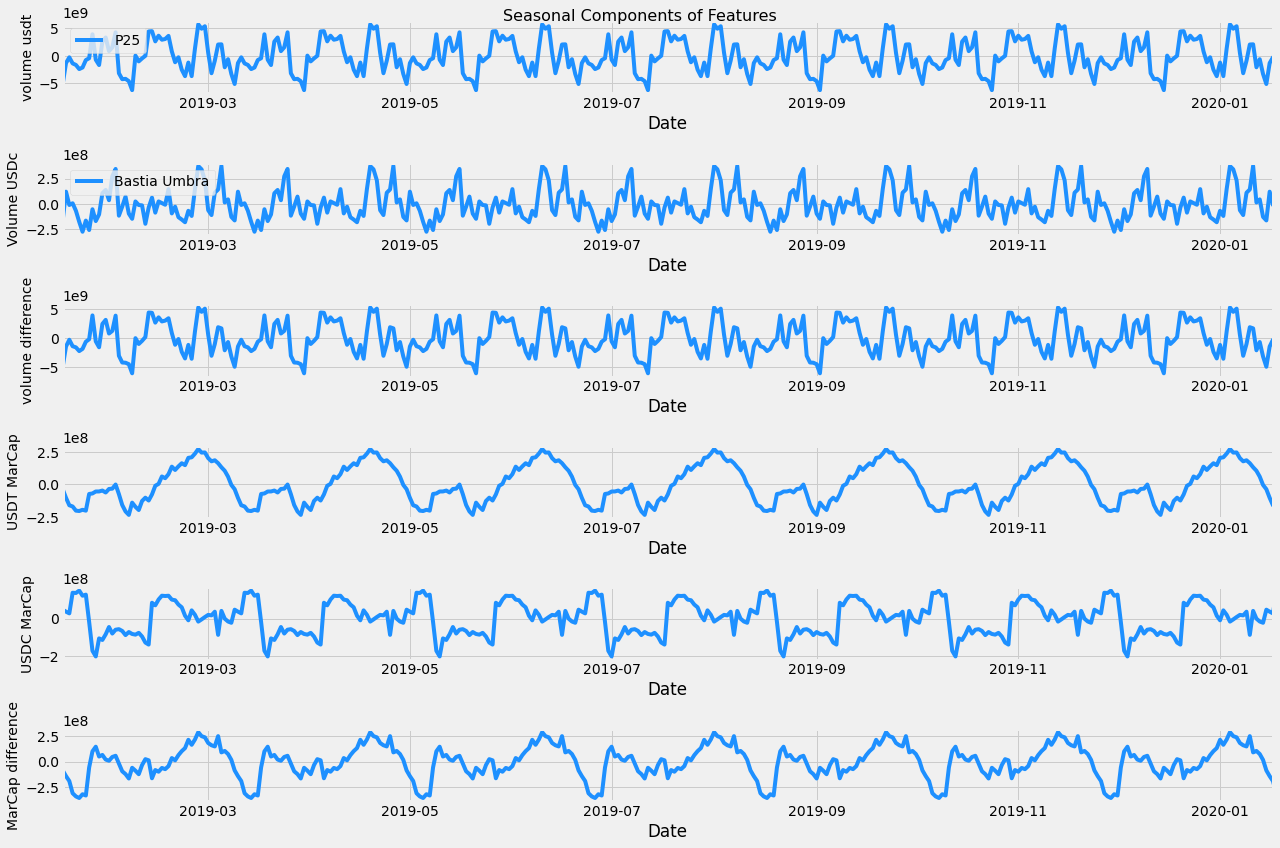

In [ ]:
f, ax = plt.subplots(nrows=6, ncols=1, figsize=(18, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)
sns.lineplot(x=df_stable.index , y=df_stable['volume usdt_seasonal'], ax=ax[0], color='dodgerblue', label='P25')
ax[0].set_ylabel(ylabel='volume usdt', fontsize=14)

sns.lineplot(x=df_stable.index, y=df_stable['Volume USDc_seasonal'], ax=ax[1], color='dodgerblue', label='Bastia Umbra')
ax[1].set_ylabel(ylabel='Volume USDc', fontsize=14)

sns.lineplot(x=df_stable.index, y=df_stable['volume difference_seasonal'], ax=ax[2], color='dodgerblue')
ax[2].set_ylabel(ylabel='volume difference', fontsize=14)

sns.lineplot(x=df_stable.index, y=df_stable['USDT MarCap_seasonal'], ax=ax[3], color='dodgerblue')
ax[3].set_ylabel(ylabel='USDT MarCap', fontsize=14)

sns.lineplot(x=df_stable.index, y=df_stable['USDC MarCap_seasonal'], ax=ax[4], color='dodgerblue')
ax[4].set_ylabel(ylabel='USDC MarCap', fontsize=14)

sns.lineplot(x=df_stable.index, y=df_stable['MarCap difference_seasonal'], ax=ax[5], color='dodgerblue')
ax[5].set_ylabel(ylabel='MarCap difference', fontsize=14)

for i in range(6):
    ax[i].set_xlim(pd.Timestamp('2019-01-16'), pd.Timestamp('2020-01-17'))

# for i in range(6):
#     ax[i].set_xlim([datetime(2017, 9, 30), datetime(2020, 6, 30)])
plt.tight_layout()
plt.show()

Trends

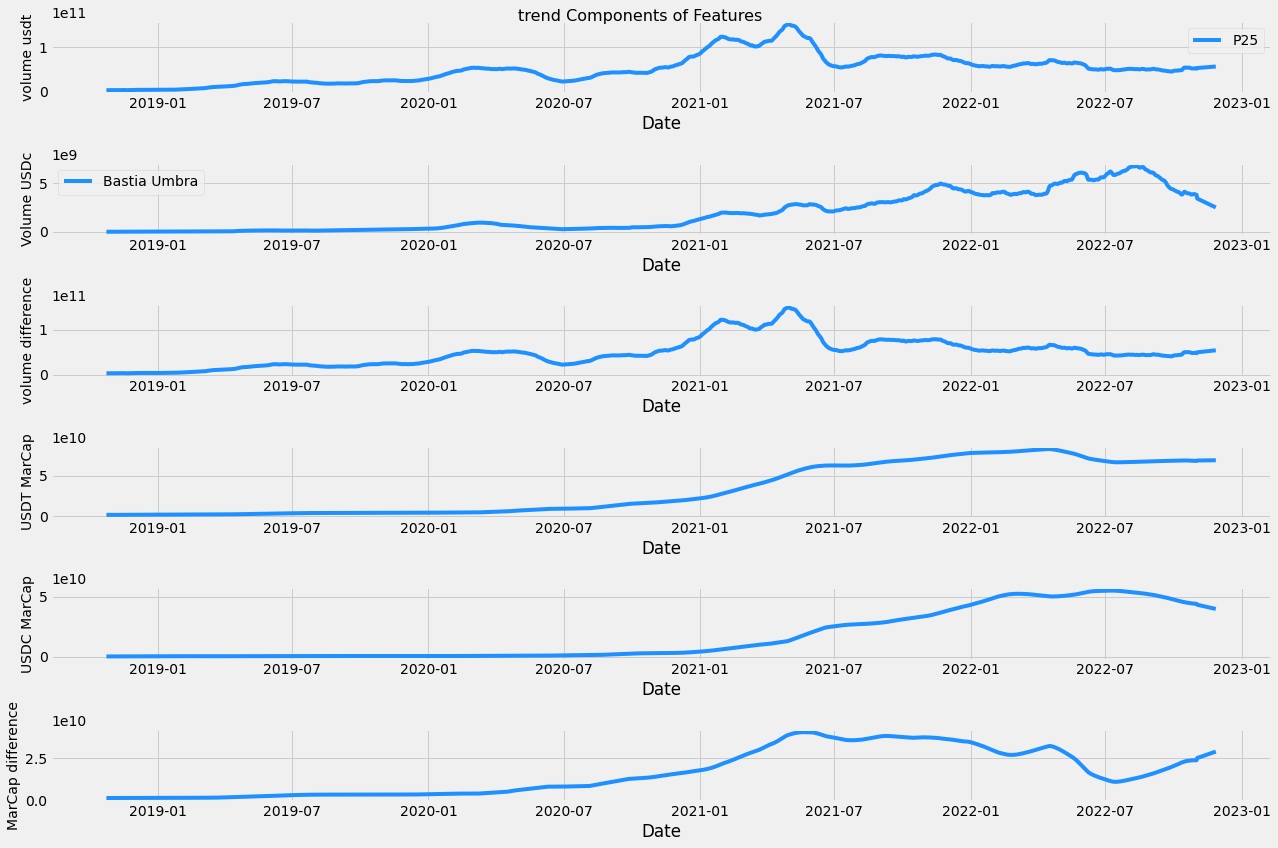

In [ ]:
f, ax = plt.subplots(nrows=6, ncols=1, figsize=(18, 12))
f.suptitle('trend Components of Features', fontsize=16)
sns.lineplot(x=df_stable.index , y=df_stable['volume usdt_trend'], ax=ax[0], color='dodgerblue', label='P25')
ax[0].set_ylabel(ylabel='volume usdt', fontsize=14)

sns.lineplot(x=df_stable.index, y=df_stable['Volume USDc_trend'], ax=ax[1], color='dodgerblue', label='Bastia Umbra')
ax[1].set_ylabel(ylabel='Volume USDc', fontsize=14)

sns.lineplot(x=df_stable.index, y=df_stable['volume difference_trend'], ax=ax[2], color='dodgerblue')
ax[2].set_ylabel(ylabel='volume difference', fontsize=14)

sns.lineplot(x=df_stable.index, y=df_stable['USDT MarCap_trend'], ax=ax[3], color='dodgerblue')
ax[3].set_ylabel(ylabel='USDT MarCap', fontsize=14)

sns.lineplot(x=df_stable.index, y=df_stable['USDC MarCap_trend'], ax=ax[4], color='dodgerblue')
ax[4].set_ylabel(ylabel='USDC MarCap', fontsize=14)

sns.lineplot(x=df_stable.index, y=df_stable['MarCap difference_trend'], ax=ax[5], color='dodgerblue')
ax[5].set_ylabel(ylabel='MarCap difference', fontsize=14)

#for i in range(6):
#   ax[i].set_xlim(pd.Timestamp('2019-01-16'), pd.Timestamp('2020-01-17'))

plt.tight_layout()
plt.show()




---



---


---



---



# **Is the data predictable or random walk?**

Applying the example of **'volume usdt'** column data only for now.

We can apply it to any column and check if the data is predictable or not.

In general, stock data and crypto data are not predictable, some minimal cases, are predictable.

In [ ]:
import numpy as np # linear algebra
from numpy.random import seed 
import math 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, date 

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import seaborn as sns

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

import statsmodels as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA

# Fix seed for reproducible results
SEED = 42
np.random.seed(SEED)

# Visualizations
lag_acf = 15
lag_pacf = 15
height = 4
width = 12

To use data for modeling, it should be stationary, by stationary we mean:

mean = zero
the variance is constant

so we first use adfuller method to check stationarity, if it is not stationary, we apply the difference method on the data to make it stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
sample = df_stable
sample['volume usdt']

Date
2018-10-24     1781560000
2018-10-25     1677800000
2018-10-26     1881270000
2018-10-27     1671750000
2018-10-28     1729890000
                 ...     
2022-11-23    45720458651
2022-11-24    36841695607
2022-11-25    25728613650
2022-11-26    25190862393
2022-11-27    27588594951
Name: volume usdt, Length: 1496, dtype: int64

In [ ]:
check_stationarity(sample['volume usdt'])

ADF Statistic: -2.694423
p-value: 0.075008
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Non-stationary


It showed that it is not stationary, so we apply differencing.

In [ ]:
sample['volume usdt diff'] = sample['volume usdt'].diff().fillna(0)

display(sample.head(5).style.set_caption('Sample Time Series'))

check_stationarity(sample['volume usdt diff'])

,volume usdt,Volume USDc,volume difference,Volume % C/T,USDT MarCap,USDC MarCap,MarCap difference,MarCap % C/T,volume usdt_trend,volume usdt_seasonal,Volume USDc_trend,Volume USDc_seasonal,volume difference_trend,volume difference_seasonal,USDT MarCap_trend,USDT MarCap_seasonal,USDC MarCap_trend,USDC MarCap_seasonal,MarCap difference_trend,MarCap difference_seasonal,volume usdt diff
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-24 00:00:00,1781560000,923940,1780636060,0.000519,2003344845,85597084,1917747761,0.042725,3250643236.662484,-4599260719.097846,9131546.028625,-93659346.991578,3241511690.633858,-4505601372.106270,1695644307.326240,-234672674.298274,73518779.490738,-71847238.282844,1622125527.835503,-162825436.015426,0.000000
2018-10-25 00:00:00,1677800000,1365520,1676434480,0.000814,1904828474,85423351,1819405123,0.044861,3263003013.511960,-6234410837.140070,9334067.531196,-144846656.107052,3253668945.980762,-6089564181.033019,1699030371.387705,-140442101.661466,76370000.148350,-82207114.726609,1622660371.239355,-58234986.934857,-103760000.000000
2018-10-26 00:00:00,1881270000,950623,1880319377,0.000505,1906751043,125705149,1781045894,0.065918,3275362790.361436,42191404.086938,9536589.033768,26441768.827542,3265826201.327667,15749635.259396,1702416435.449170,-172604985.935135,79221220.805963,-85736514.357707,1623195214.643207,-86868471.577430,203470000.000000
2018-10-27 00:00:00,1671750000,712963,1671037037,0.000427,1913123646,125258974,1787864672,0.065491,3287722567.210912,-1006276398.669810,9739110.536339,-8780528.985544,3277983456.674572,-997495869.684264,1705802499.510635,-197299301.902773,82072441.463576,-76182209.122425,1623730058.047059,-121117092.780348,-209520000.000000
2018-10-28 00:00:00,1729890000,282707,1729607293,0.000163,1923441561,125585474,1797856087,0.065308,3300082344.060388,-464140083.655003,9941632.038911,-12067042.451482,3290140712.021476,-452073041.203521,1709188563.572100,-127642949.739109,84923662.121189,-95584173.145101,1624264901.450911,-32058776.594009,58140000.000000


ADF Statistic: -10.377535
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Stationary


Comparing the **real data of 'volume USDT'** with the **differenced data of 'volume USDT'**

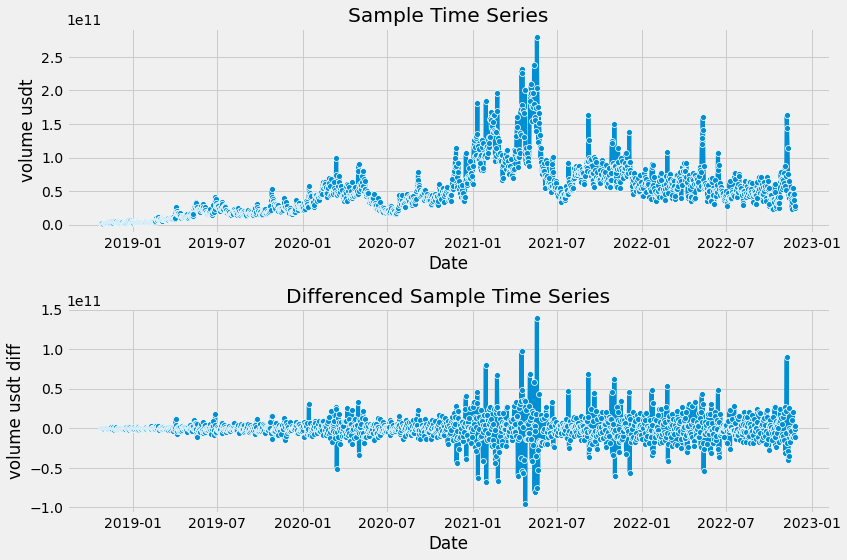

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.lineplot(x=sample.index, y=sample['volume usdt'], marker='o', ax=ax[0])
# ax[0].set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])

ax[0].set_title('Sample Time Series')

sns.lineplot(x=sample.index, y=sample['volume usdt diff'], marker='o', ax=ax[1])
# ax[1].set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax[1].set_title('Differenced Sample Time Series')
plt.tight_layout()
plt.show()

Since data is now stationary, we plot the **ACF** autocorrelation function and the **PACF** partial autocorrelation function, to see if we can use the ARIMA model or not

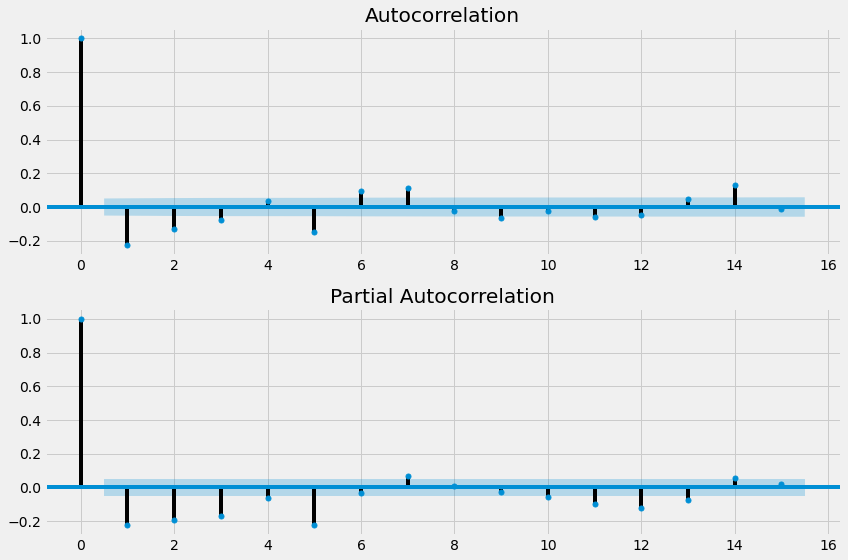

In [ ]:
T = 12
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(sample['volume usdt diff'],lags=lag_acf, ax=ax[0])
plot_pacf(sample['volume usdt diff'],lags=lag_pacf, ax=ax[1], method='ols')

# for i in range(2):
#     ax[i].axvline(x=T, color='r', linestyle='--')
#     ax[i].set_xlim([-0.5, lag_acf+0.5])
#     ax[i].set_ylim([-1.1, 1.1])
    
plt.tight_layout()
plt.show()

By interpreting the ACF and PACF plots, we conclude that we don't have significant correlations between data at type t and data at time t-k where k is any lag back in time.

So we can't model and predict the data using the ARIMA model, we may use other models like Prophet or LSTM deep learning models, and see if they can provide acceptable scores in terms of accuracy.